<a href="https://colab.research.google.com/github/nfarkas7/TMU-final-project-codes/blob/main/TMU_final_project_draft_code_Loading_and_cleaning_data_%2B_exploratory_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
# LIBRARIES
import urllib
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

In [46]:
#import data

from google.colab import files
uploaded = files.upload()

Saving ttc-bus-delay-data-2014.xlsx to ttc-bus-delay-data-2014 (1).xlsx
Saving ttc-bus-delay-data-2015.xlsx to ttc-bus-delay-data-2015 (1).xlsx
Saving ttc-bus-delay-data-2016.xlsx to ttc-bus-delay-data-2016 (1).xlsx
Saving ttc-bus-delay-data-2017.xlsx to ttc-bus-delay-data-2017 (1).xlsx
Saving ttc-bus-delay-data-2018.xlsx to ttc-bus-delay-data-2018 (1).xlsx
Saving ttc-bus-delay-data-2019.xlsx to ttc-bus-delay-data-2019 (1).xlsx
Saving ttc-bus-delay-data-2020.xlsx to ttc-bus-delay-data-2020 (1).xlsx
Saving ttc-bus-delay-data-2021.xlsx to ttc-bus-delay-data-2021 (1).xlsx
Saving ttc-bus-delay-data-2022.xlsx to ttc-bus-delay-data-2022 (1).xlsx
Saving ttc-bus-delay-data-2023.xlsx to ttc-bus-delay-data-2023 (1).xlsx
Saving ttc-bus-delay-data-2024.xlsx to ttc-bus-delay-data-2024 (1).xlsx
Saving ttc-streetcar-delay-data-2014.xlsx to ttc-streetcar-delay-data-2014 (1).xlsx
Saving ttc-streetcar-delay-data-2015.xlsx to ttc-streetcar-delay-data-2015 (1).xlsx
Saving ttc-streetcar-delay-data-2016.xls

#LOADING DATA - and checking attribute types

In [47]:
#NOTE: 221,632 without "reading all the sheets" - 798,405 WITH reading all the sheets, for just bus and streetcar

#193975 - with just the first 2 years, streetcar and bus test
#661524 - with just bus
# 4 bus+ streetcar (2014-2017) - 369,149 records - yes good

#NOTE: "direction" has both capitals and non-capitals - you're going to need to fix that

#attempting 6 each (2014-2019) - 532,946 records - YES ISSUE
#5 each (2014-2018) - 458,688 records - here, Min delay show up twice, second time is blank. so it's in the 2018 sets - NO! there are no blank columns and no duplicated "min delay" column in the original files
# and if i upload only 2018 - yes the ghost column is there

#somewhere in 2023 and 2024, Line and	Bound show up - but they're not ghost columns!! - what is the difference between "direction" and "bound"??

#note - also time shows up differently -> sometimes it's 00:00:00, others (like in 2023 and 22024) it's 02:30+


In [48]:


# List to store dataframes from all sheets of all files
dataframes = []

# Loop through uploaded files
for content in uploaded.values():
    # Read all sheets from the current Excel file into a dictionary of dataframes
    sheets_dict = pd.read_excel(content, sheet_name=None)

    # Append each dataframe to the list
    for new_df in sheets_dict.values():
        dataframes.append(new_df)

# Concatenate all dataframes into one
loaded_df = pd.concat(dataframes, ignore_index=True)




In [49]:
#create a new_df to work with - NOTE THIS IS NEW - make sure this works when you run it
new_df = loaded_df

In [50]:
len(new_df)
#note: should be 798,405 653105

798405

In [51]:
new_df.head()

,Report Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle,Min Delay,Incident ID,Delay,Gap,Date,Line,Bound,Unnamed: 10
0,2014-01-01,95,00:23:00,Wednesday,York Mills station,Mechanical,10.0,20.0,E,1734.0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
1,2014-01-01,102,00:55:00,Wednesday,Entire run for route,General Delay,33.0,66.0,b/w,8110.0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
2,2014-01-01,54,01:28:00,Wednesday,lawrence and Warden,Mechanical,10.0,20.0,WB,7478.0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
3,2014-01-01,112,01:30:00,Wednesday,Kipling Station,Emergency Services,18.0,36.0,N,8084.0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
4,2014-01-01,24,01:37:00,Wednesday,VP and Ellesmere,Investigation,10.0,20.0,n,7843.0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN


In [52]:
# FINDING ATTRIBUTE TYPES
attribute_types = {}

for column in new_df.columns:
    if new_df[column].dtype == 'object':
        unique_values = new_df[column].nunique()
        if unique_values < 10:
            attribute_types[column] = 'ordinal'
        else:
            attribute_types[column] = 'nominal'
    else:
        attribute_types[column] = 'quantitative'

for attribute, attr_type in attribute_types.items():
    print(f"{attribute}: {attr_type}")


    #how many options are each? Display counts of unique values for each categorical attribute
categorical_counts = new_df.select_dtypes(include='object').nunique()
display(categorical_counts)


Report Date: quantitative
Route: nominal
Time: nominal
Day: ordinal
Location: nominal
Incident: nominal
Min Delay: quantitative
Min Gap: quantitative
Direction: nominal
Vehicle: quantitative
 Min Delay: quantitative
Incident ID: quantitative
Delay: quantitative
Gap: quantitative
Date: quantitative
Line: nominal
Bound: nominal
Unnamed: 10: ordinal


Route             566
Time             2918
Day                 7
Location       144937
Incident           37
Direction        1226
Line               66
Bound              13
Unnamed: 10         1
dtype: int64

In [53]:

attribute_types_df = pd.DataFrame(list(attribute_types.items()), columns=['Attribute', 'Type'])
print("Attribute Types:")
display(attribute_types_df)

Attribute Types:


,Attribute,Type
0,Report Date,quantitative
1,Route,nominal
2,Time,nominal
3,Day,ordinal
4,Location,nominal
5,Incident,nominal
6,Min Delay,quantitative
7,Min Gap,quantitative
8,Direction,nominal
9,Vehicle,quantitative


#DATA CLEANING - dealing with missing values

In [11]:
#how many NaNs are there?

total_nans = new_df.isna().sum().sum()

print("Total number of NaNs in the dataset:", total_nans)

#result: when run first, it's 6,512,333
#which is about 45% of the dataset, meaning you can't just blanket delete all of them

#as of wednesday, down to 3,864,262

Total number of NaNs in the dataset: 6512333


In [12]:
#first, what's unnamed 10? can we get rid of that?
non_nan_df = new_df[new_df['Unnamed: 10'].notna()]
non_nan_df.tail(5)

#it's one entry, we're going to get rid of it

new_df = new_df.drop(columns=['Unnamed: 10'])

In [13]:
#is "min delay" showing up twice? this takes it out

new_df= new_df.drop(new_df.columns[10],axis=1)


In [14]:
#Min Delay and Delay
#times when they are both blank? yeah, 6,046 of them. take them out

na_test2 = new_df[pd.isna(new_df['Min Delay']) & pd.isna(new_df['Delay'])]
len(na_test2)

6046

In [15]:
#take out NAs that have no "delay" - aka have no values in either Min Delay or Delay

new_df = new_df.dropna(subset=['Min Delay', 'Delay'], how='all')


In [16]:
#but, sometimes there is a blank in Min Delay but then the information is in Delay

na_test3 = new_df[pd.isna(new_df['Min Delay']) | pd.isna(new_df['Delay'])]
len(na_test3)

#result - all of them have blank in either min delay or delay (information is in one or the other, but never both)
#great, that means we can combine them - into Combined_delay


792359

In [17]:
#creating the Combined_delay column
new_df['delay_combined'] = np.where(~new_df['Min Delay'].isna(), new_df['Min Delay'], new_df['Delay'])


In [18]:
#Creating the combined column for Bound and Direction
#new_df['bound_or_direction'] = np.where(~new_df['Min Delay'].isna(), new_df['Min Delay'], new_df['Delay'])

new_df['bound_or_direction'] = new_df['Direction'].fillna(new_df['Bound'])

#this drops the NaNs
new_df = new_df.dropna(subset=['bound_or_direction'])

#this turns them all capitals (same case)
new_df['bound_or_direction'] = new_df['bound_or_direction'].str.upper()

In [19]:
#we only want instances that actually caused delays - aka values above 0
#2.8% of the dataset. That's fine to take out

new_df = new_df.drop(new_df[new_df['delay_combined'] <= 0].index)

In [20]:
duplicated_columns = new_df.columns.duplicated()

# Get the duplicated column names
duplicated_column_names = new_df.columns[duplicated_columns]

if duplicated_column_names.any():
    print("Duplicate column names found:", duplicated_column_names)
else:
    print("No duplicate column names found")


No duplicate column names found


In [21]:
#dealing with duplicates and mis-spellings in Incident

#lets look at what's in there:
incident_id_table = new_df.groupby('Incident')['Incident ID'].unique().reset_index()
incident_id_table

#things i notice:


#Late is there twice - might have a space in front of it?


#Collision - TTC, Collision - TTC Involved
#Road Block - Non-TTC Collision, Road Blocked - NON-TTC Collision, Roadblock by Collision - Non-TTC
#Securitty, Security
#e

#NOTE: how to deal with sub-categories (they're not mis-spellings)

#cleaning (Cleaning,Cleaning - Disinfection, Cleaning - Unsanitary)
## collision, #Late Entering Service, Late Entering Service - Mechanical;
#Late leaving garage (Late Leaving Garage, Late Leaving Garage - Management,Late Leaving Garage - Mechanical,Late Leaving Garage - Operations,Late Leaving Garage - Operator, Late Leaving Garage - Vision)
#Operations, Operations - Operator
# Overhead, Overhead - Pantograph

,Incident,Incident ID
0,Cleaning,[nan]
1,Cleaning - Disinfection,[nan]
2,Cleaning - Unsanitary,[nan]
3,Collision - TTC,[nan]
4,Collision - TTC Involved,[nan]
5,Diversion,"[nan, 3.0]"
6,Emergency Services,"[nan, 6.0]"
7,General Delay,"[nan, 8.0]"
8,Held By,"[nan, 7.0]"
9,Investigation,"[nan, 5.0]"


In [22]:
#dealing with all the mispelled incident problems:

#2 incidents that are just 'e'
#e_incidents = new_df[new_df['Incident'] == 'e']

new_df = new_df.drop(new_df[new_df['Incident'] == 'e'].index)

# Replace 'Securitty' with 'Security'
new_df['Incident'] = new_df['Incident'].replace('Securitty', 'Security')


#Non-TTC Collision, Road Blocked - NON-TTC Collision, Roadblock by Collision - Non-TTC - 2,340 of them
new_df['Incident'] = new_df['Incident'].replace('Road Blocked - NON-TTC Collision', 'Road Block - Non-TTC Collision')
new_df['Incident'] = new_df['Incident'].replace('Roadblock by Collision - Non-TTC', 'Road Block - Non-TTC Collision')

#Collision - TTC, Collision - TTC Involved - 12,007
new_df['Incident'] = new_df['Incident'].replace('Collision - TTC', 'Collision - TTC Involved')

#now those 2 are super similar, but keep the distinction (in case it matters), so we're gonna have the big bucket be "Collision"
#Collision - TTC Involved
#Collision - Non-TTC Collision Road Block
new_df['Incident'] = new_df['Incident'].replace('Road Block - Non-TTC Collision', 'Collision - Non-TTC Collision Road Block')



In [23]:
#an Incident ID of 9 was found to mean "late leaving garage":
new_df.loc[new_df['Incident ID'] == 9.0, 'Incident'] = 'Late Leaving Garage'

#also, sometimes both are blank:
new_df = new_df.dropna(subset=['Incident', 'Incident ID'], how='all')



In [24]:
#CHECK this!! make sure the codes are right - a lot of the NaNs in clean_df are coming from Incident ID

#but more often it's the other way around, and incident ID is blank, but we have the Incident and corresponding code elsewhere

#an Incident ID of 3 means "Diversion", 6 means Emergency Services, , 8 is General Delay,

#7 is both held by and something else


new_df.loc[new_df['Incident'] == 'Mechanical', 'Incident ID'] = 1.0

new_df.loc[new_df['Incident'] == 'Diversion', 'Incident ID'] = 3.0

new_df.loc[new_df['Incident'] == 'Utilized Off Route', 'Incident ID'] = 4.0

new_df.loc[new_df['Incident'] == 'Investigation', 'Incident ID'] = 5.0

new_df.loc[new_df['Incident'] == 'Emergency Services', 'Incident ID'] = 6.0

new_df.loc[new_df['Incident'] == 'General Delay', 'Incident ID'] = 8.0

new_df.loc[new_df['Incident'] == 'Late Leaving Garage - Operator', 'Incident ID'] = 10.0

new_df.loc[new_df['Incident'] == 'Late Leaving Garage - Mechanical', 'Incident ID'] = 11.0

new_df.loc[new_df['Incident'] == 'Late Leaving Garage - Management', 'Incident ID'] = 12.0


In [25]:
#route and line - buses use "route", streetcars use "Line"

new_df['route_or_line'] = new_df['Route'].fillna(new_df['Line'])

In [26]:
#Report Date and Date
#NONE have both blank, great, so we can consolidate them

na_test7 = new_df[pd.notna(new_df['Report Date']) & pd.notna(new_df['Date'])]

new_df['date_consolidated'] = new_df['Report Date'].fillna(new_df['Date'])

new_df

,Report Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle,Incident ID,Delay,Gap,Date,Line,Bound,delay_combined,bound_or_direction,route_or_line,date_consolidated
0,2014-01-01,95,00:23:00,Wednesday,York Mills station,Mechanical,10.0,20.0,E,1734.0,1.0,NaN,NaN,NaT,NaN,NaN,10.0,E,95,2014-01-01
1,2014-01-01,102,00:55:00,Wednesday,Entire run for route,General Delay,33.0,66.0,b/w,8110.0,8.0,NaN,NaN,NaT,NaN,NaN,33.0,B/W,102,2014-01-01
2,2014-01-01,54,01:28:00,Wednesday,lawrence and Warden,Mechanical,10.0,20.0,WB,7478.0,1.0,NaN,NaN,NaT,NaN,NaN,10.0,WB,54,2014-01-01
3,2014-01-01,112,01:30:00,Wednesday,Kipling Station,Emergency Services,18.0,36.0,N,8084.0,6.0,NaN,NaN,NaT,NaN,NaN,18.0,N,112,2014-01-01
4,2014-01-01,24,01:37:00,Wednesday,VP and Ellesmere,Investigation,10.0,20.0,n,7843.0,5.0,NaN,NaN,NaT,NaN,NaN,10.0,N,24,2014-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
798395,NaT,NaN,19:13,Sunday,SPADINA STATION,Operations,15.0,23.0,NaN,4504.0,NaN,NaN,NaN,2024-03-31,510,S,15.0,S,510,2024-03-31
798396,NaT,NaN,20:12,Sunday,BROADVIEW STATION,Operations,10.0,20.0,NaN,4579.0,NaN,NaN,NaN,2024-03-31,505,S,10.0,S,505,2024-03-31
798397,NaT,NaN,20:26,Sunday,RONCESVALLES AND QUEEN,Emergency Services,10.0,20.0,NaN,4459.0,6.0,NaN,NaN,2024-03-31,504,S,10.0,S,504,2024-03-31
798398,NaT,NaN,20:46,Sunday,RONCESVALLES AND QUEEN,Operations,10.0,20.0,NaN,4589.0,NaN,NaN,NaN,2024-03-31,504,E,10.0,E,504,2024-03-31


In [37]:
#fixing spelling and other errors in Location

new_df
unique_locations_count = new_df['Location'].nunique()

unique_locations_count

#needs more cleaning! - no wonder it's crashing 118,525 is way too many unique locations - 137,797 - 129,655 - 106,017, 105, 501, 105,499


99786

In [35]:
import numpy as np
import re

# Define a function to clean and capitalize location names
def clean_location(location):
    if isinstance(location, str):
        # List of replacements
        replacements = {
            "/Eglinton/Bayview": "Eglinton and Bayview",
            "Yonge/Wilson": "Yonge and Wilson",
            "162 Lawrence-donway": "162 Lawrence Donway",
            "121 Fort Yor-esplanade Route": " Esplanade Route",
            "steele": "Steeles",
            "Stn": "Station",
            " stn": "Station",
            "stn.": "Station",
            "STn": "Station",
            "dtn.": "Station",
            "blvd": "Boulevard",
            "lp": "Loop",
            "rte": "Route",
            "rd": "Road",
            "Rd": "Road",
            "pl": "Place",
            "Pl.": "Place",
            "VP": "Victoria Park",
            "Mt": "Mount",
            "Mt.": "Mount",
            "STC": "Scarborough Town Centre",
            "Hosp.": "Hospital",
            "&": "and",
            " & ": " and ",
            "/": " and ",
            " @ ": " at ",
            " 0": ""  # To handle "0" at the beginning of strings
        }

        # Apply general replacements
        for old, new in replacements.items():
            location = location.replace(old, new)

        # Pattern matching for "121 Fort " and "165 Weston "
        if re.match(r'^121 Fort ', location):
            location = "Fort York Route"
        if re.match(r'^165 Weston ', location):
            location = "165 Weston Road"

        # Additional replacements for "Flemingdon Park Route"
        flemingdon_replacements = [
            '1 Flamingdon Park', '1 Flamingdon Route', '1 Flamington Road', '1 Flamington Route', '1 Flem Park Route.',
            '1 Flemingdon', '1 Flemingdon Park', '1 Flemingdon Park Route', '1 Flemingdon Pk Route', '1 Flemingdon Route',
            '1 Flemingdon Rte', '1 Flemington Park', '1 Flemington Park Route', '1 Flemington Park Route.',
            '1 Flemington Route', '1 Flemington Route Both Ways', '1 Fleminton Route', '1 Flemm Park Route',
            '1 Flemmingdon', '1 Flemmingdon Park', '1 Flenmigdon Route', '1 Flenmington Route', '1 Flmingtog Park',
            '00 Flemington Route', '00 Flemmington Route',
            '100 Flamingdon Park', '100 Flamingdon Route', '100 Flamington Road', '100 Flamington Route',
            '100 Flem Park Route.', '100 Flemingdon', '100 Flemingdon Park', '100 Flemingdon Park Route',
            '100 Flemingdon Pk Route', '100 Flemingdon Route', '100 Flemingdon Rte', '100 Flemington Park',
            '100 Flemington Park Route', '100 Flemington Park Route.', '100 Flemington Route',
            '100 Flemington Route Both Ways', '100 Fleminton Route', '100 Flemm Park Route', '100 Flemmingdon',
            '100 Flemmingdon Park', '100 Flenmigdon Route', '100 Flenmington Route', '100 Flmingtog Park'
        ]

        if location in flemingdon_replacements:
            location = "Flemingdon Park Route"

        # Replace specific patterns with "Lawrence Route"
        lawrence_replacements = ['%4 Lawerence Route', '%4 Lawrence Route']
        if location in lawrence_replacements:
            location = "Lawrence Route"

        # Replace specific patterns with specified values
        specific_replacements = {
            '( Finch Station ) Finch Ave West At Romfield Lane': 'Finch Ave West At Romfield Lane',
            '*^ Scarborough Rpute': 'Scarborough Route',
            ',main To Broadview': 'Main to Broadview'
        }
        if location in specific_replacements:
            location = specific_replacements[location]

        # Remove symbols from the beginning of the string
        while location and location[0] in ["@", "#", "'", "!", "# ", ".", "% ", "%4"]:
            location = location[1:]

        # Capitalize first letter of each word
        location = ' '.join(word.capitalize() for word in location.split())

    return location

# Remove rows with specific unwanted values
unwanted_values = [
    '', '" A" Bus Routing From Casino', '"a" Bus', '$01 And Mccowan Ramp', '$07 To Shepparoad Ave', '00:52',
    '(d) Service Lakeshore And Marine Parade', '(none Provided)', '(outside) Mccaul Loop'
]
new_df = new_df[~new_df['Location'].isin(unwanted_values)]

# Remove rows where Location column contains only numbers or only spaces
new_df = new_df.dropna(subset=['Location'])  # Remove rows with NaN in 'Location'
new_df = new_df[~new_df['Location'].str.strip().str.isnumeric()]  # Remove rows with only numbers
new_df = new_df[new_df['Location'].str.strip().astype(bool)]  # Remove rows that are empty or contain only spaces

# Apply the cleaning function to the 'Location' column
new_df['Location'] = new_df['Location'].apply(clean_location)

print(new_df['Location'].unique())


['York Mills Station' 'Entire Run For Route' 'Lawrence And Waroaden' ...
 'St Clair W And Deer Pa' 'Queen Quay Ferry Docks'
 'St Clair And And Caled']


In [38]:

unique_locations = new_df['Location'].dropna().unique()
unique_locations_sorted = sorted(unique_locations)
unique_locations_sorted

['025 Don Mills Express',
 '0533 Yonge And Queens Quay',
 '07 Bathurst Route All Branch',
 '1 A Thorburn Ave',
 '1 And 3 Concoroade Pl',
 '1 Arrow Road',
 '1 Benvenuto Place',
 '1 Carlton St',
 '1 Cherry Street ( Che',
 '1 Civic Centre Court',
 '1 Coleridge Ave',
 '1 Concoroade Place',
 '1 Davies Ave',
 '1 High Meadow Pl',
 '1 Kingston Road.',
 '1 Lipton Ave',
 '1 Lynndale Road',
 '1 Springhurst',
 '1 Stop W Of Starspray Loop',
 '1 Valentine Drive',
 '1 White Ave',
 '1) Lairoad 2) Midland',
 '10 Ansforoad Ave',
 '10 Bathurst St',
 '10 Disco Road',
 '10 Dundas Street - Yonge To Dundas Street',
 '10 Fort Rouille',
 '10 Garnett Janes Road',
 '10 Gervais Dr',
 '10 Humberwood Blvd',
 '10 Livonia Place',
 '10 Lower Jarvis',
 '10 Lower Jarvis St',
 '10 Ritchie Ave',
 '10 Ruden Crescent',
 '10 Van Horne Route-all Branch',
 '10 Wickman Road',
 '10 Yewfield Cres',
 '10 Yonge Street',
 '100 Antibes',
 '100 Antibes Dr',
 '100 Bridgeland',
 '100 Broadview Station',
 '100 Consilium Just N. Of Progre

In [28]:
#new_df['Incident'] = new_df['Incident'].replace('Road Blocked - NON-TTC Collision', 'Road Block - Non-TTC Collision')

In [114]:
#taking away all the either-or columns -  columns 'Report Date', 'Route', 'Min Delay', 'Direction', 'Delay', 'Line', and 'Bound'

clean_df = new_df.drop(columns=['Report Date', 'Date', 'Route', 'Min Delay', 'Direction', 'Delay', 'Line', 'Bound', 'Gap', 'Min Gap', 'Incident ID'])
##i don't want to deal with gap, Incident ID is useless because there are duplicates, and i fixed it the other way around (incident ID but no incident name)
clean_df

,Time,Day,Location,Incident,Vehicle,delay_combined,bound_or_direction,route_or_line,date_consolidated
0,00:23:00,Wednesday,York Mills Station,Mechanical,1734.0,10.0,E,95,2014-01-01
1,00:55:00,Wednesday,Entire Run For Route,General Delay,8110.0,33.0,B/W,102,2014-01-01
2,01:28:00,Wednesday,Lawrence And Warden,Mechanical,7478.0,10.0,WB,54,2014-01-01
3,01:30:00,Wednesday,Kipling Station,Emergency Services,8084.0,18.0,N,112,2014-01-01
4,01:37:00,Wednesday,Victoria Park And Ellesmere,Investigation,7843.0,10.0,N,24,2014-01-01
...,...,...,...,...,...,...,...,...,...
798395,19:13,Sunday,Spadina Station,Operations,4504.0,15.0,S,510,2024-03-31
798396,20:12,Sunday,Broadview Station,Operations,4579.0,10.0,S,505,2024-03-31
798397,20:26,Sunday,Roncesvalles And Queen,Emergency Services,4459.0,10.0,S,504,2024-03-31
798398,20:46,Sunday,Roncesvalles And Queen,Operations,4589.0,10.0,E,504,2024-03-31


In [115]:
total_nans = clean_df.isna().sum().sum()

total_nans

71132

In [116]:
#where are there still NaNs? in route_or_line and Vehicle
nan_df = clean_df[clean_df.isna().any(axis=1)]

nan_df

,Time,Day,Location,Incident,Vehicle,delay_combined,bound_or_direction,route_or_line,date_consolidated
92,14:19:00,Wednesday,Bathurst And Wilson,Mechanical,NaN,9.0,N,7,2014-01-01
145,05:21:00,Thursday,Pape Station,Late Leaving Garage,NaN,14.0,S,72,2014-01-02
153,05:29:00,Thursday,Warden Station,General Delay,NaN,40.0,NB,68,2014-01-02
253,06:46:00,Thursday,Victoria Park Station,Mechanical,NaN,6.0,N,24,2014-01-02
259,06:49:00,Thursday,Woodbine Station,Late Leaving Garage,NaN,7.0,S,92,2014-01-02
...,...,...,...,...,...,...,...,...,...
794720,13:16,Thursday,Main Street Station,Mechanical,0.0,10.0,W,NaN,2024-01-04
794936,08:35,Tuesday,King And Dufferin,Held By,4485.0,63.0,W,NaN,2024-01-09
796064,01:38,Sunday,Long Branch Loop,Mechanical,3347.0,20.0,E,NaN,2024-02-04
796552,06:17,Friday,Bathurst And Queen,Mechanical,4431.0,10.0,S,NaN,2024-02-16


In [44]:
# Drop all rows with NaNs in clean_df
clean_df = clean_df.dropna()




NameError: name 'clean_df' is not defined

In [118]:
len(clean_df)

#you ended up removing about 18% of the original dataset (in terms of number of rows)

653072

#EXPLORATORY ANALYSIS - Summary stats, outliers, and initial descriptive analysis

In [41]:
attribute_types = {}

for column in new_df.columns:
    if new_df[column].dtype == 'object':
        unique_values = new_df[column].nunique()
        if unique_values < 10:
            attribute_types[column] = 'ordinal'
        else:
            attribute_types[column] = 'nominal'
    else:
        attribute_types[column] = 'quantitative'

for attribute, attr_type in attribute_types.items():
    print(f"{attribute}: {attr_type}")


    #how many options are each? Display counts of unique values for each categorical attribute
categorical_counts = new_df.select_dtypes(include='object').nunique()

attribute_types_df = pd.DataFrame(list(attribute_types.items()), columns=['Attribute', 'Type'])
print("Attribute Types:")
display(attribute_types_df)

Report Date: quantitative
Route: nominal
Time: nominal
Day: ordinal
Location: nominal
Incident: nominal
Min Delay: quantitative
Min Gap: quantitative
Direction: nominal
Vehicle: quantitative
Incident ID: quantitative
Delay: quantitative
Gap: quantitative
Date: quantitative
Line: nominal
Bound: nominal
delay_combined: quantitative
bound_or_direction: nominal
route_or_line: nominal
date_consolidated: quantitative
Attribute Types:


,Attribute,Type
0,Report Date,quantitative
1,Route,nominal
2,Time,nominal
3,Day,ordinal
4,Location,nominal
5,Incident,nominal
6,Min Delay,quantitative
7,Min Gap,quantitative
8,Direction,nominal
9,Vehicle,quantitative


In [43]:
# Max, min, mean and standard deviation of attributes


summary_stats = clean_df.describe()
display(summary_stats)


#NOTE: this is only going to do this for quantitative datatypes
#What's going on here - vehicle number isn't actually a quantitative data type

NameError: name 'clean_df' is not defined

In [ ]:
#right away, need to deal with OUTLIERS
min_delay_mean = clean_df['delay_combined'].mean()
min_delay_std = clean_df['delay_combined'].std()

condition = ((clean_df['delay_combined'] - min_delay_mean).abs() <= 5 * min_delay_std)

no_outliers_df = clean_df[condition]


In [ ]:
no_outliers_df.describe()

#what this tells me is that delays are very heavily skewed towards the lower (left) end of the distribution

In [ ]:
median_delay = no_outliers_df['delay_combined'].median()
median_delay

In [ ]:

# Create a scatter plot without outliers
plt.figure(figsize=(10, 6))
plt.scatter(no_outliers_df['delay_combined'], range(len(no_outliers_df)), alpha=0.5)
plt.title('Scatter Pot of Delays')
plt.xlabel('Min Dela')
plt.ylabel('Index')
plt.show()

In [ ]:


# Create a histogram of the 'delay_combined' column
plt.figure(figsize=(10, 6))
plt.hist(no_outliers_df['delay_combined'], bins=50, alpha=0.5)
plt.title('Histogram of Delays')
plt.xlabel('Min Delay')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Define the bins and labels for the groups
bins = [0, 5, 10, 15, float('inf')]
labels = ['low', 'medium', 'high', 'very high']

# Create a new column 'delay_group' in the DataFrame
no_outliers_df['delay_group'] = pd.cut(no_outliers_df['delay_combined'], bins=bins, labels=labels)

no_outliers_df.tail()

In [ ]:
#
# Convert the 'delay_group' column to a category type with the specified order
no_outliers_df['delay_group'] = pd.Categorical(no_outliers_df['delay_group'], categories=['low', 'medium', 'high', 'very high'], ordered=True)

#histogram using delay_group
plt.figure(figsize=(10, 6))
plt.hist(no_outliers_df['delay_group'], bins=50, alpha=0.5)
plt.title('Histogram of Delays, by level')
plt.xlabel('delay_group')
plt.ylabel('Frequency')
plt.show()

#THIS IS STILL OUT OF ORDER. WHY

In [ ]:
# Create a frequency table of the 'delay_combined' column
frequency_table = no_outliers_df['delay_group'].value_counts().reset_index()

# Rename the columns
frequency_table.columns = ['delay_group', 'frequency']

ordered_frequency_table = frequency_table.sort_values(by='frequency', ascending=False)

# Print the ordered frequency table
ordered_frequency_table


In [ ]:
#what is the most common reason for delays?

# Group by 'Incident' and count occurrences, then sort by count in descending order
incident_counts = no_outliers_df.groupby('Incident').size().reset_index(name='Count')

incident_counts.sort_values(by='Count', ascending=False)


In [ ]:
# Count occurrences of each incident
incident_counts = no_outliers_df['Incident'].value_counts()

# Calculate percentages
incident_percentages = (incident_counts / len(new_df)) * 100

incident_percentages

In [ ]:
#NOTE: if you're going to deal with the sub-categories, it should be here

In [ ]:
no_outliers_df

#DOWNLOADING THE DATA INTO A NEW CSV

In [119]:
no_outliers_df.to_csv('no_outliers_df.csv', index=False)

# Download the CSV file to your local machine
files.download('no_outliers_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#NOTES AND UNUSED CODE

In [ ]:
#the above processing was exceeding the available RAM, so it needed to be saved as a separate CSV for the feature engineering stage
no_outliers_df.to_csv('no_outliers.csv')



In [46]:
no_outliers_df.to_csv('C:\\Users\\natalie.farkas\\Documents\\TMU\\no_outliers.csv')



In [ ]:
#export/save it as a different dataframe and reload

In [ ]:
#for variables that are not binary (aka ordinal), create dummy variables to then integrate into model (again because model can only interpret numeric values)

#first, create copy of dataset
model_df = no_outliers_df.copy()

#converting target variable to binary
#map_dict = {'yes':1, 'no':0}


#model_df['new_y'] = model_df['y'].map(map_dict)
#model_df['default'] = model_df['default'].map(map_dict)
#model_df['housing'] = model_df['housing'].map(map_dict)
#model_df['loan'] = model_df['loan'].map(map_dict)


#then create "dummy variables"
day_dummies = pd.get_dummies(no_outliers_df['Day'], prefix='day_')
location_dummies = pd.get_dummies(no_outliers_df['Location'], prefix= 'location_')
incident_dummies = pd.get_dummies(no_outliers_df['Incident'], prefix= 'incident_')
bound_direction_dummies = pd.get_dummies(no_outliers_df['bound_or_direction'], prefix= 'direction_')
route_line_dummies = pd.get_dummies(no_outliers_df['route_or_line'],prefix='route_')
delay_group_dummies = pd.get_dummies(no_outliers_df['delay_group'], prefix= 'delaygrp_')



#add dummy variables to dataset, and delete the original columns (could also do this in a loop, but easier to see this way)
model_df= model_df.join(day_dummies).drop(columns='Day')
model_df= model_df.join(location_dummies).drop(columns='Location')
model_df= model_df.join(incident_dummies).drop(columns='Incident')
model_df= model_df.join(bound_direction_dummies).drop(columns='bound_or_direction')
model_df= model_df.join(route_line_dummies).drop(columns='route_or_line')
model_df= model_df.join(delay_group_dummies).drop(columns='delay_group')

model_df= model_df.drop(columns="y")

display(model_df)



#OTHER CODE AND NOTES

In [ ]:
#Summary notes for removing NaNs:

##This dataset had a lot of null values and duplicated columns, namely: "Report Date" and Date, Direction and Bound, Incident and Incident ID, Min Delay and Delay.
##Simply excluding all nan values across the board could create skews as there were so many, and sometimes no information recorded direction would appear in Bound, and they indicated the same thing but were just recorded differentlly
## i went through all 8 (4 groups) of related colums, and removed NaN that were only in both columns



In [ ]:
#NOTE - you need to turn dates into date time object (a datatype in python) - for both report date and date - you need to standardize it

This is where you stopped!
still have to fix:
-  time isn't in a consistent format
- turn vehicle number into a string, not a numeric value, remove the decimal

Do the exploratory analysis next

take the log to normalize the distribution

#NOTE:

where to go from here:

MORE CLEANING

what are you trying to predict? the severity of the delay (Min delay and Delay)

fix date time

CORRELATIONS

then a correlation matrix -> look at the different relationships between the delay metric as a number

then histograms of 'most commons', what days happens the most/times are the most



FEATURE ENGINEERING

then feature engineering (including scaling)
- look out for: multi co-linearity

create 'buckets' for low, medium, high

dummy variables


THEN THE MODELS:

then run the decision forest model

ensemble forest (decision tree)
- XG boost (gradient boost)


run a linear regression
(ridge regression, lasso regression, possible)




for later - "dart" is a new package for time series analysis
single variable generic forcasting python package - ARIMA

this is different than a regression - regressions can't predict the future, only fitting to a line - it can 'predict' give month, day, time, it can show enough of a pattern to say it's possible that x value will appear



In [ ]:
#not sure if the below is correct:

In [ ]:
large_delay_count = (new_df['Min Delay'] >= 15).sum()

large_delay_count

14666

In [ ]:
((new_df['Min Delay'] >= 15).sum())/len(new_df)

0.19905264729434438

In [ ]:
53279/191159

0.27871562416626994

In [ ]:
#note: what do we learn from this? that the delays (in minutes) are actually quite close together, but are skewed by high delays (27% of total delays) in the 4th quartile

In [ ]:
#what did we learn from this? That there are only 8 different recorded incident types. mechanical being the most common, accounting for 44% of the reason for delays


In [ ]:
#THIS DELETES NAs! BE CAREFUL IF YOU RUN THIS

# Get indices of rows in new_df where 'Min Delay' is less than or equal to 0
#indices_to_remove = new_df[new_df['Min Delay'] <= 0].index
indices_to_remove = new_df[(new_df['Min Delay'] <= 0) | (new_df['Min Delay'] > 200000)].index

# Drop rows from new_df that appear in filtered_df
new_df = new_df.drop(indices_to_remove)

In [ ]:
#THIS WILL ALSO DELETE VALUES

new_df = new_df.dropna(subset=['Min Delay'])  # Drop rows with NaN values
new_df = new_df[~new_df['Min Delay'].isin([np.inf, -np.inf])]  # Drop rows with infinite values

ValueError: The data contains non-finite values.

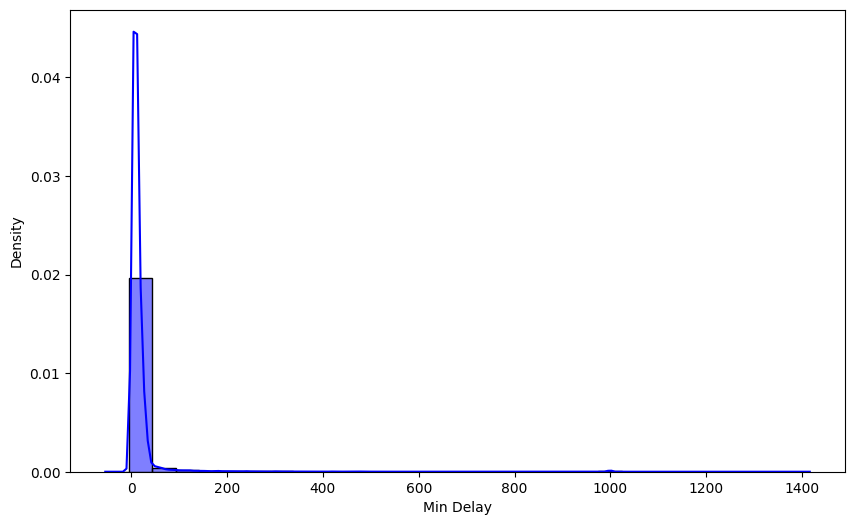

In [ ]:

from scipy.stats import norm

# Plot histogram of 'Min Delay'
plt.figure(figsize=(10, 6))
sns.histplot(no_outliers_df['De'], kde=True, stat='density', bins=30, color='blue', edgecolor='black')

# Overlay a normal distribution curve
mu, std = norm.fit(no_outliers_df['Min Delay'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

plt.title('Histogram of Min Delay with Normal Distribution Fit')
plt.xlabel('Min Delay')
plt.ylabel('Density')
plt.show()


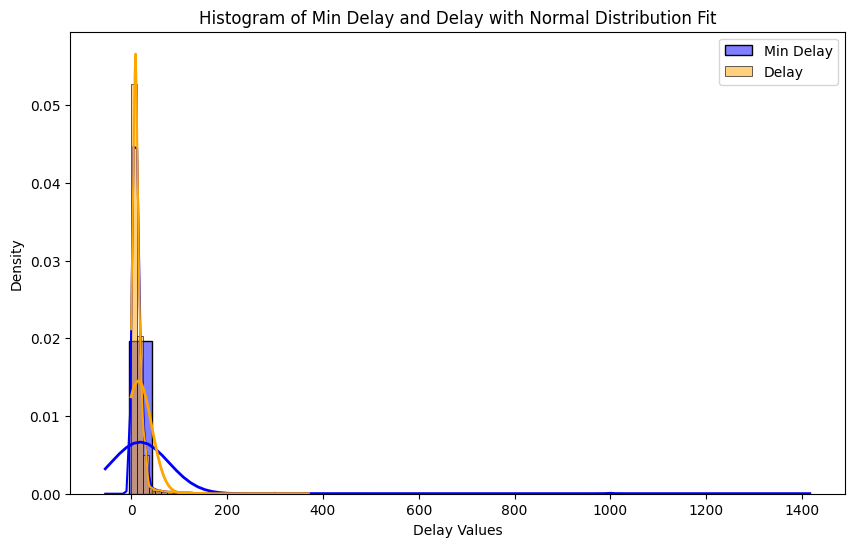

In [ ]:


#what does this do?
# Plot histogram of 'Min Delay' and 'Delay' together
plt.figure(figsize=(10, 6))
sns.histplot(no_outliers_df['Min Delay'], kde=True, stat='density', bins=30, color='blue', edgecolor='black', label='Min Delay')
sns.histplot(no_outliers_df['Delay'], kde=True, stat='density', bins=30, color='orange', edgecolor='black', label='Delay')

# Overlay normal distribution curves for 'Min Delay'
mu_min_delay, std_min_delay = norm.fit(no_outliers_df['Min Delay'].dropna())
x_min_delay = np.linspace(no_outliers_df['Min Delay'].min(), no_outliers_df['Min Delay'].max(), 100)
p_min_delay = norm.pdf(x_min_delay, mu_min_delay, std_min_delay)
plt.plot(x_min_delay, p_min_delay, 'b', linewidth=2)

# Overlay normal distribution curves for 'Delay'
mu_delay, std_delay = norm.fit(no_outliers_df['Delay'].dropna())
x_delay = np.linspace(no_outliers_df['Delay'].min(), no_outliers_df['Delay'].max(), 100)
p_delay = norm.pdf(x_delay, mu_delay, std_delay)
plt.plot(x_delay, p_delay, 'orange', linewidth=2)

plt.title('Histogram of Min Delay and Delay with Normal Distribution Fit')
plt.xlabel('Delay Values')
plt.ylabel('Density')
plt.legend()
plt.show()